In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2

In [5]:
def calc_pixels_from_mask(masks_dir, masks) :
    pixels = []

    for mask in masks :
        path = os.path.join(masks_dir, mask)
        img = cv2.imread(path)

        # non zero pixel 수 계산
        pix = np.count_nonzero(img)
        pixels.append(pix)

    return pixels

In [6]:
masks_dir = './data/segmentation/testannot'
label_data = './data/labels.csv'

masks = os.listdir(masks_dir)
masks.sort()

label_df = pd.read_csv(label_data)
label_df.set_index('img_name', inplace=True)
label_df = label_df.sort_values(by='img_name', axis=0)

label_df.head()

,leaf_weight
img_name,
CASE01_01.png,49.193
CASE01_02.png,59.764
CASE01_03.png,72.209
CASE01_04.png,85.737
CASE01_05.png,102.537


In [7]:
pixels = calc_pixels_from_mask(masks_dir, masks)

In [9]:
len(pixels)

1592

In [10]:
x_data = np.array(pixels)
x_data = x_data.reshape(-1,1)
y_data = label_df['leaf_weight'].values
y_data = y_data.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
train_x_data, valid_x_data, train_y_data, valid_y_data = \
train_test_split(x_data, y_data, test_size=0.2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(train_x_data)
scaler_y.fit(train_y_data)

scaled_train_x = scaler_x.transform(train_x_data)
scaled_train_y = scaler_y.transform(train_y_data)

scaled_valid_x = scaler_x.transform(valid_x_data)
scaled_valid_y = scaler_y.transform(valid_y_data)

In [16]:
scaled_train_x.shape

(1273, 1)

In [17]:
scaled_valid_y.shape

(319, 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()
model.add(Dense(input_dim=1, units=64, activation='relu', use_bias=True))
model.add(Dense(units=1, activation='linear', use_bias=True))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [23]:
LEARNING_RATE = 1e-4
model.compile(loss='mae',
             optimizer=SGD(learning_rate=LEARNING_RATE),
             metrics=['mae'])

history = model.fit(scaled_train_x,
                    scaled_train_y,
                   epochs=5000,
                    validation_data = (scaled_valid_x, scaled_valid_y),
                   verbose=2)

Epoch 1/5000
40/40 - 0s - loss: 0.1430 - mae: 0.1430 - val_loss: 0.1423 - val_mae: 0.1423
Epoch 2/5000
40/40 - 0s - loss: 0.1419 - mae: 0.1419 - val_loss: 0.1410 - val_mae: 0.1410
Epoch 3/5000
40/40 - 0s - loss: 0.1408 - mae: 0.1408 - val_loss: 0.1397 - val_mae: 0.1397
Epoch 4/5000
40/40 - 0s - loss: 0.1397 - mae: 0.1397 - val_loss: 0.1384 - val_mae: 0.1384
Epoch 5/5000
40/40 - 0s - loss: 0.1385 - mae: 0.1385 - val_loss: 0.1372 - val_mae: 0.1372
Epoch 6/5000
40/40 - 0s - loss: 0.1374 - mae: 0.1374 - val_loss: 0.1359 - val_mae: 0.1359
Epoch 7/5000
40/40 - 0s - loss: 0.1363 - mae: 0.1363 - val_loss: 0.1347 - val_mae: 0.1347
Epoch 8/5000
40/40 - 0s - loss: 0.1353 - mae: 0.1353 - val_loss: 0.1335 - val_mae: 0.1335
Epoch 9/5000
40/40 - 0s - loss: 0.1342 - mae: 0.1342 - val_loss: 0.1323 - val_mae: 0.1323
Epoch 10/5000
40/40 - 0s - loss: 0.1332 - mae: 0.1332 - val_loss: 0.1312 - val_mae: 0.1312
Epoch 11/5000
40/40 - 0s - loss: 0.1321 - mae: 0.1321 - val_loss: 0.1300 - val_mae: 0.1300
Epoch 12

40/40 - 0s - loss: 0.0931 - mae: 0.0931 - val_loss: 0.0874 - val_mae: 0.0874
Epoch 92/5000
40/40 - 0s - loss: 0.0928 - mae: 0.0928 - val_loss: 0.0872 - val_mae: 0.0872
Epoch 93/5000
40/40 - 0s - loss: 0.0926 - mae: 0.0926 - val_loss: 0.0869 - val_mae: 0.0869
Epoch 94/5000
40/40 - 0s - loss: 0.0923 - mae: 0.0923 - val_loss: 0.0867 - val_mae: 0.0867
Epoch 95/5000
40/40 - 0s - loss: 0.0921 - mae: 0.0921 - val_loss: 0.0865 - val_mae: 0.0865
Epoch 96/5000
40/40 - 0s - loss: 0.0919 - mae: 0.0919 - val_loss: 0.0862 - val_mae: 0.0862
Epoch 97/5000
40/40 - 0s - loss: 0.0916 - mae: 0.0916 - val_loss: 0.0860 - val_mae: 0.0860
Epoch 98/5000
40/40 - 0s - loss: 0.0914 - mae: 0.0914 - val_loss: 0.0858 - val_mae: 0.0858
Epoch 99/5000
40/40 - 0s - loss: 0.0912 - mae: 0.0912 - val_loss: 0.0856 - val_mae: 0.0856
Epoch 100/5000
40/40 - 0s - loss: 0.0909 - mae: 0.0909 - val_loss: 0.0853 - val_mae: 0.0853
Epoch 101/5000
40/40 - 0s - loss: 0.0907 - mae: 0.0907 - val_loss: 0.0851 - val_mae: 0.0851
Epoch 102/5

Epoch 181/5000
40/40 - 0s - loss: 0.0734 - mae: 0.0734 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 182/5000
40/40 - 0s - loss: 0.0732 - mae: 0.0732 - val_loss: 0.0684 - val_mae: 0.0684
Epoch 183/5000
40/40 - 0s - loss: 0.0730 - mae: 0.0730 - val_loss: 0.0682 - val_mae: 0.0682
Epoch 184/5000
40/40 - 0s - loss: 0.0728 - mae: 0.0728 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 185/5000
40/40 - 0s - loss: 0.0726 - mae: 0.0726 - val_loss: 0.0679 - val_mae: 0.0679
Epoch 186/5000
40/40 - 0s - loss: 0.0724 - mae: 0.0724 - val_loss: 0.0677 - val_mae: 0.0677
Epoch 187/5000
40/40 - 0s - loss: 0.0722 - mae: 0.0722 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 188/5000
40/40 - 0s - loss: 0.0720 - mae: 0.0720 - val_loss: 0.0673 - val_mae: 0.0673
Epoch 189/5000
40/40 - 0s - loss: 0.0718 - mae: 0.0718 - val_loss: 0.0671 - val_mae: 0.0671
Epoch 190/5000
40/40 - 0s - loss: 0.0717 - mae: 0.0717 - val_loss: 0.0669 - val_mae: 0.0669
Epoch 191/5000
40/40 - 0s - loss: 0.0715 - mae: 0.0715 - val_loss: 0.0667 - val_

40/40 - 0s - loss: 0.0573 - mae: 0.0573 - val_loss: 0.0530 - val_mae: 0.0530
Epoch 271/5000
40/40 - 0s - loss: 0.0572 - mae: 0.0572 - val_loss: 0.0528 - val_mae: 0.0528
Epoch 272/5000
40/40 - 0s - loss: 0.0570 - mae: 0.0570 - val_loss: 0.0527 - val_mae: 0.0527
Epoch 273/5000
40/40 - 0s - loss: 0.0569 - mae: 0.0569 - val_loss: 0.0525 - val_mae: 0.0525
Epoch 274/5000
40/40 - 0s - loss: 0.0567 - mae: 0.0567 - val_loss: 0.0524 - val_mae: 0.0524
Epoch 275/5000
40/40 - 0s - loss: 0.0565 - mae: 0.0565 - val_loss: 0.0522 - val_mae: 0.0522
Epoch 276/5000
40/40 - 0s - loss: 0.0564 - mae: 0.0564 - val_loss: 0.0521 - val_mae: 0.0521
Epoch 277/5000
40/40 - 0s - loss: 0.0562 - mae: 0.0562 - val_loss: 0.0519 - val_mae: 0.0519
Epoch 278/5000
40/40 - 0s - loss: 0.0561 - mae: 0.0561 - val_loss: 0.0517 - val_mae: 0.0517
Epoch 279/5000
40/40 - 0s - loss: 0.0559 - mae: 0.0559 - val_loss: 0.0516 - val_mae: 0.0516
Epoch 280/5000
40/40 - 0s - loss: 0.0557 - mae: 0.0557 - val_loss: 0.0514 - val_mae: 0.0514
Epo

Epoch 360/5000
40/40 - 0s - loss: 0.0443 - mae: 0.0443 - val_loss: 0.0406 - val_mae: 0.0406
Epoch 361/5000
40/40 - 0s - loss: 0.0442 - mae: 0.0442 - val_loss: 0.0405 - val_mae: 0.0405
Epoch 362/5000
40/40 - 0s - loss: 0.0441 - mae: 0.0441 - val_loss: 0.0404 - val_mae: 0.0404
Epoch 363/5000
40/40 - 0s - loss: 0.0439 - mae: 0.0439 - val_loss: 0.0403 - val_mae: 0.0403
Epoch 364/5000
40/40 - 0s - loss: 0.0438 - mae: 0.0438 - val_loss: 0.0402 - val_mae: 0.0402
Epoch 365/5000
40/40 - 0s - loss: 0.0437 - mae: 0.0437 - val_loss: 0.0401 - val_mae: 0.0401
Epoch 366/5000
40/40 - 0s - loss: 0.0435 - mae: 0.0435 - val_loss: 0.0399 - val_mae: 0.0399
Epoch 367/5000
40/40 - 0s - loss: 0.0434 - mae: 0.0434 - val_loss: 0.0398 - val_mae: 0.0398
Epoch 368/5000
40/40 - 0s - loss: 0.0433 - mae: 0.0433 - val_loss: 0.0397 - val_mae: 0.0397
Epoch 369/5000
40/40 - 0s - loss: 0.0432 - mae: 0.0432 - val_loss: 0.0396 - val_mae: 0.0396
Epoch 370/5000
40/40 - 0s - loss: 0.0430 - mae: 0.0430 - val_loss: 0.0395 - val_

Epoch 450/5000
40/40 - 0s - loss: 0.0335 - mae: 0.0335 - val_loss: 0.0305 - val_mae: 0.0305
Epoch 451/5000
40/40 - 0s - loss: 0.0334 - mae: 0.0334 - val_loss: 0.0304 - val_mae: 0.0304
Epoch 452/5000
40/40 - 0s - loss: 0.0333 - mae: 0.0333 - val_loss: 0.0303 - val_mae: 0.0303
Epoch 453/5000
40/40 - 0s - loss: 0.0331 - mae: 0.0331 - val_loss: 0.0302 - val_mae: 0.0302
Epoch 454/5000
40/40 - 0s - loss: 0.0330 - mae: 0.0330 - val_loss: 0.0302 - val_mae: 0.0302
Epoch 455/5000
40/40 - 0s - loss: 0.0329 - mae: 0.0329 - val_loss: 0.0301 - val_mae: 0.0301
Epoch 456/5000
40/40 - 0s - loss: 0.0328 - mae: 0.0328 - val_loss: 0.0300 - val_mae: 0.0300
Epoch 457/5000
40/40 - 0s - loss: 0.0327 - mae: 0.0327 - val_loss: 0.0299 - val_mae: 0.0299
Epoch 458/5000
40/40 - 0s - loss: 0.0326 - mae: 0.0326 - val_loss: 0.0298 - val_mae: 0.0298
Epoch 459/5000
40/40 - 0s - loss: 0.0325 - mae: 0.0325 - val_loss: 0.0297 - val_mae: 0.0297
Epoch 460/5000
40/40 - 0s - loss: 0.0324 - mae: 0.0324 - val_loss: 0.0296 - val_

40/40 - 0s - loss: 0.0259 - mae: 0.0259 - val_loss: 0.0240 - val_mae: 0.0240
Epoch 540/5000
40/40 - 0s - loss: 0.0259 - mae: 0.0259 - val_loss: 0.0240 - val_mae: 0.0240
Epoch 541/5000
40/40 - 0s - loss: 0.0258 - mae: 0.0258 - val_loss: 0.0240 - val_mae: 0.0240
Epoch 542/5000
40/40 - 0s - loss: 0.0258 - mae: 0.0258 - val_loss: 0.0239 - val_mae: 0.0239
Epoch 543/5000
40/40 - 0s - loss: 0.0258 - mae: 0.0258 - val_loss: 0.0239 - val_mae: 0.0239
Epoch 544/5000
40/40 - 0s - loss: 0.0257 - mae: 0.0257 - val_loss: 0.0238 - val_mae: 0.0238
Epoch 545/5000
40/40 - 0s - loss: 0.0257 - mae: 0.0257 - val_loss: 0.0238 - val_mae: 0.0238
Epoch 546/5000
40/40 - 0s - loss: 0.0256 - mae: 0.0256 - val_loss: 0.0238 - val_mae: 0.0238
Epoch 547/5000
40/40 - 0s - loss: 0.0256 - mae: 0.0256 - val_loss: 0.0237 - val_mae: 0.0237
Epoch 548/5000
40/40 - 0s - loss: 0.0255 - mae: 0.0255 - val_loss: 0.0237 - val_mae: 0.0237
Epoch 549/5000
40/40 - 0s - loss: 0.0255 - mae: 0.0255 - val_loss: 0.0237 - val_mae: 0.0237
Epo

Epoch 629/5000
40/40 - 0s - loss: 0.0238 - mae: 0.0238 - val_loss: 0.0224 - val_mae: 0.0224
Epoch 630/5000
40/40 - 0s - loss: 0.0238 - mae: 0.0238 - val_loss: 0.0224 - val_mae: 0.0224
Epoch 631/5000
40/40 - 0s - loss: 0.0238 - mae: 0.0238 - val_loss: 0.0224 - val_mae: 0.0224
Epoch 632/5000
40/40 - 0s - loss: 0.0238 - mae: 0.0238 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 633/5000
40/40 - 0s - loss: 0.0238 - mae: 0.0238 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 634/5000
40/40 - 0s - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 635/5000
40/40 - 0s - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 636/5000
40/40 - 0s - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 637/5000
40/40 - 0s - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 638/5000
40/40 - 0s - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 639/5000
40/40 - 0s - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0223 - val_

40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0221 - val_mae: 0.0221
Epoch 719/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0221 - val_mae: 0.0221
Epoch 720/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 721/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 722/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 723/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 724/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 725/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 726/5000
40/40 - 0s - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 727/5000
40/40 - 0s - loss: 0.0232 - mae: 0.0232 - val_loss: 0.0220 - val_mae: 0.0220
Epoch 728/5000
40/40 - 0s - loss: 0.0232 - mae: 0.0232 - val_loss: 0.0220 - val_mae: 0.0220
Epo

Epoch 808/5000
40/40 - 0s - loss: 0.0225 - mae: 0.0225 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 809/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 810/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 811/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 812/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 813/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 814/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 815/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0212 - val_mae: 0.0212
Epoch 816/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0211 - val_mae: 0.0211
Epoch 817/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0211 - val_mae: 0.0211
Epoch 818/5000
40/40 - 0s - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0211 - val_

40/40 - 0s - loss: 0.0217 - mae: 0.0217 - val_loss: 0.0205 - val_mae: 0.0205
Epoch 898/5000
40/40 - 0s - loss: 0.0217 - mae: 0.0217 - val_loss: 0.0205 - val_mae: 0.0205
Epoch 899/5000
40/40 - 0s - loss: 0.0217 - mae: 0.0217 - val_loss: 0.0205 - val_mae: 0.0205
Epoch 900/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0205 - val_mae: 0.0205
Epoch 901/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 902/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 903/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 904/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 905/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 906/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 907/5000
40/40 - 0s - loss: 0.0216 - mae: 0.0216 - val_loss: 0.0204 - val_mae: 0.0204
Epo

Epoch 987/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 988/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 989/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 990/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 991/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 992/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 993/5000
40/40 - 0s - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 994/5000
40/40 - 0s - loss: 0.0211 - mae: 0.0211 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 995/5000
40/40 - 0s - loss: 0.0211 - mae: 0.0211 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 996/5000
40/40 - 0s - loss: 0.0211 - mae: 0.0211 - val_loss: 0.0199 - val_mae: 0.0199
Epoch 997/5000
40/40 - 0s - loss: 0.0211 - mae: 0.0211 - val_loss: 0.0199 - val_

Epoch 1076/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1077/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1078/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1079/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1080/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1081/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1082/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1083/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1084/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1085/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 1086/5000
40/40 - 0s - loss: 0.0209 - mae: 0.0209 - val_loss: 0.

40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1165/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1166/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1167/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1168/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1169/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1170/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1171/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1172/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1173/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 1174/5000
40/40 - 0s - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0196 - val_mae: 

Epoch 1253/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1254/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1255/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1256/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1257/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1258/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1259/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1260/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1261/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1262/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 1263/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.

40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1342/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1343/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1344/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1345/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1346/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1347/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1348/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1349/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1350/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 1351/5000
40/40 - 0s - loss: 0.0206 - mae: 0.0206 - val_loss: 0.0194 - val_mae: 

Epoch 1430/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1431/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1432/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1433/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1434/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1435/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1436/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1437/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1438/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1439/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 1440/5000
40/40 - 0s - loss: 0.0205 - mae: 0.0205 - val_loss: 0.

40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1519/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1520/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1521/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1522/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1523/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1524/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1525/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1526/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1527/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 1528/5000
40/40 - 0s - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0192 - val_mae: 

Epoch 1607/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1608/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1609/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1610/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1611/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1612/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1613/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1614/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1615/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1616/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1617/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.

40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1696/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1697/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1698/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1699/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1700/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1701/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1702/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1703/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1704/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 1705/5000
40/40 - 0s - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0191 - val_mae: 

Epoch 1784/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1785/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1786/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1787/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1788/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1789/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1790/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1791/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1792/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1793/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1794/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.

40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1873/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1874/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1875/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1876/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1877/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1878/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1879/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1880/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1881/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 0.0190
Epoch 1882/5000
40/40 - 0s - loss: 0.0202 - mae: 0.0202 - val_loss: 0.0190 - val_mae: 

Epoch 1961/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1962/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1963/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1964/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1965/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1966/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1967/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1968/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1969/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1970/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 1971/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.

40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2050/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2051/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2052/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2053/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2054/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2055/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2056/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 2057/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2058/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2059/5000
40/40 - 0s - loss: 0.0201 - mae: 0.0201 - val_loss: 0.0189 - val_mae: 

Epoch 2138/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2139/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2140/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2141/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2142/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2143/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2144/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2145/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2146/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2147/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2148/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.

40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2227/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2228/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2229/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2230/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2231/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2232/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2233/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2234/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2235/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 2236/5000
40/40 - 0s - loss: 0.0200 - mae: 0.0200 - val_loss: 0.0188 - val_mae: 

Epoch 2315/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2316/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2317/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2318/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2319/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2320/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2321/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2322/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2323/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2324/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2325/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.

Epoch 2404/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2405/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2406/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2407/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2408/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2409/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2410/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2411/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2412/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2413/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2414/5000
40/40 - 0s - loss: 0.0199 - mae: 0.0199 - val_loss: 0.

40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2493/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2494/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2495/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2496/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2497/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2498/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2499/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2500/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2501/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 2502/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0187 - val_mae: 

Epoch 2581/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2582/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2583/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2584/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2585/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2586/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2587/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2588/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2589/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2590/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2591/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.

40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2670/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2671/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2672/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2673/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2674/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2675/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2676/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2677/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2678/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2679/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 

Epoch 2758/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2759/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2760/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2761/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2762/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2763/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2764/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2765/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2766/5000
40/40 - 0s - loss: 0.0198 - mae: 0.0198 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2767/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2768/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.

Epoch 2847/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2848/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2849/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2850/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2851/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2852/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2853/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2854/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2855/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2856/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 2857/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.

40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2936/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2937/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2938/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2939/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2940/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2941/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2942/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2943/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2944/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 2945/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 

Epoch 3024/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3025/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3026/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3027/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3028/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3029/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3030/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3031/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3032/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3033/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3034/5000
40/40 - 0s - loss: 0.0197 - mae: 0.0197 - val_loss: 0.

Epoch 3112/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3113/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3114/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3115/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3116/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3117/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3118/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3119/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3120/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3121/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3122/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.

40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3201/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3202/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3203/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3204/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3205/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3206/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3207/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3208/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3209/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 3210/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0185 - val_mae: 

Epoch 3289/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3290/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3291/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3292/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3293/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3294/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3295/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3296/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3297/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3298/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3299/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.

40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3378/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3379/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3380/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3381/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3382/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3383/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3384/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3385/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3386/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3387/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 

Epoch 3466/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3467/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3468/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3469/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3470/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3471/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3472/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3473/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3474/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3475/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3476/5000
40/40 - 0s - loss: 0.0196 - mae: 0.0196 - val_loss: 0.

40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3555/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3556/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3557/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3558/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3559/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3560/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3561/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3562/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3563/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3564/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 

Epoch 3643/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3644/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3645/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3646/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3647/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3648/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3649/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3650/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3651/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3652/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 3653/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.

40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3732/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3733/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3734/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3735/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3736/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3737/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3738/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3739/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3740/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3741/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 

Epoch 3820/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3821/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3822/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3823/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3824/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3825/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3826/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3827/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3828/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3829/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3830/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.

Epoch 3909/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3910/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3911/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3912/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3913/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3914/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3915/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3916/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3917/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3918/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3919/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.

Epoch 3998/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 3999/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4000/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4001/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4002/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4003/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4004/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4005/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4006/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4007/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4008/5000
40/40 - 0s - loss: 0.0195 - mae: 0.0195 - val_loss: 0.

40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4087/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4088/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4089/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4090/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4091/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4092/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4093/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4094/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4095/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 4096/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0183 - val_mae: 

Epoch 4175/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4176/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4177/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4178/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4179/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4180/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4181/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4182/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4183/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4184/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4185/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.

40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4264/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4265/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4266/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4267/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4268/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4269/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4270/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4271/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4272/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4273/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 

Epoch 4352/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4353/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4354/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4355/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4356/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4357/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4358/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4359/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4360/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4361/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4362/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.

Epoch 4441/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4442/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4443/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4444/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4445/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4446/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4447/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4448/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4449/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4450/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4451/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.

40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4530/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4531/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4532/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4533/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4534/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4535/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4536/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4537/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4538/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4539/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 

Epoch 4618/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4619/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4620/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4621/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4622/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4623/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4624/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4625/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4626/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0182 - val_mae: 0.0182
Epoch 4627/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4628/5000
40/40 - 0s - loss: 0.0194 - mae: 0.0194 - val_loss: 0.

40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4707/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4708/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4709/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4710/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4711/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4712/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4713/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4714/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4715/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4716/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 

Epoch 4795/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4796/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4797/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4798/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4799/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4800/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4801/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4802/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4803/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4804/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4805/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.

40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4884/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4885/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4886/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4887/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4888/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4889/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4890/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4891/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4892/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4893/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 

Epoch 4972/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4973/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4974/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4975/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4976/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4977/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4978/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4979/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4980/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4981/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 4982/5000
40/40 - 0s - loss: 0.0193 - mae: 0.0193 - val_loss: 0.

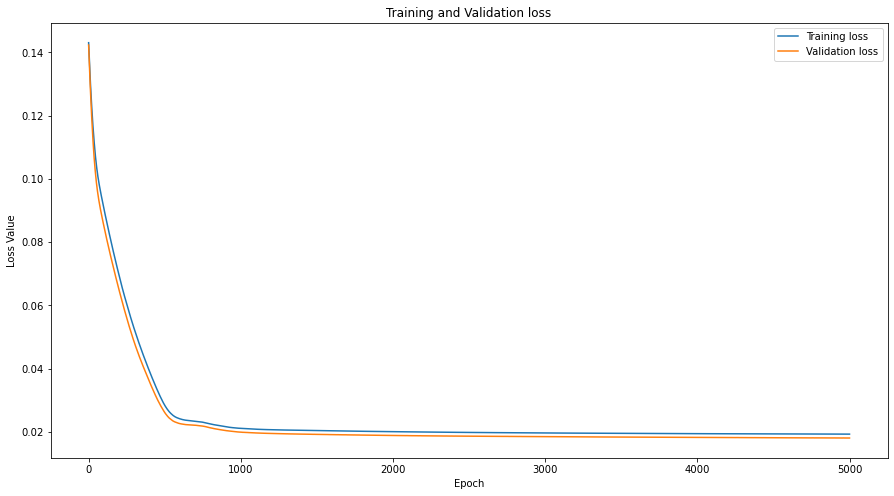

In [24]:
EPOCHS = 5000
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

fig = plt.figure(figsize=(15,8))
ax1= fig.add_subplot(1,1,1)
ax1.plot(epochs, loss, label='Training loss')
ax1.plot(epochs, val_loss, label='Validation loss')
ax1.set_title('Training and Validation loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss Value')
ax1.legend()

plt.show()

model.save('./Model_Save/Simple_linear_regression_with_pixels_epoch5000.h5')

In [25]:
valid_predict = model.predict(scaled_valid_x)

In [27]:
valid_predict = scaler_y.inverse_transform(valid_predict)

In [28]:
valid_predict

array([[ 25.21682   ],
       [ 62.929646  ],
       [ 19.365364  ],
       [  1.2142239 ],
       [245.56136   ],
       [ 46.35181   ],
       [  0.8964626 ],
       [ 64.890465  ],
       [  2.756528  ],
       [  1.5707363 ],
       [ 39.616825  ],
       [  1.872997  ],
       [ 67.28075   ],
       [ 25.28657   ],
       [  4.0508237 ],
       [  2.6170232 ],
       [ 33.525112  ],
       [  7.941461  ],
       [  1.074719  ],
       [ 13.994425  ],
       [  2.043503  ],
       [ 83.15865   ],
       [ 29.502718  ],
       [ 50.57571   ],
       [  1.8109949 ],
       [ 76.79199   ],
       [388.67706   ],
       [255.8358    ],
       [  1.7489926 ],
       [ 82.685295  ],
       [ 60.674316  ],
       [  2.8340309 ],
       [  0.849961  ],
       [ 60.39531   ],
       [384.58298   ],
       [  3.9345694 ],
       [ 47.925117  ],
       [122.334526  ],
       [185.0711    ],
       [328.163     ],
       [  8.530481  ],
       [204.31198   ],
       [ 60.488308  ],
       [  1

In [29]:
valid_y_data

array([[2.82980e+01],
       [4.31720e+01],
       [1.72990e+01],
       [1.50900e+00],
       [2.09824e+02],
       [4.65090e+01],
       [3.68000e-01],
       [4.82070e+01],
       [3.80700e+00],
       [1.67900e+00],
       [4.04110e+01],
       [1.74800e+00],
       [6.70410e+01],
       [2.35220e+01],
       [5.22200e+00],
       [3.37400e+00],
       [1.51190e+01],
       [9.36700e+00],
       [1.17400e+00],
       [1.49920e+01],
       [0.00000e+00],
       [7.20170e+01],
       [2.80800e+01],
       [3.97580e+01],
       [2.23100e+00],
       [6.62250e+01],
       [4.26320e+02],
       [2.31503e+02],
       [2.71700e+00],
       [4.09370e+01],
       [4.47020e+01],
       [2.28300e+00],
       [8.50000e-02],
       [6.18760e+01],
       [4.61639e+02],
       [3.50000e+00],
       [3.72300e+01],
       [9.38520e+01],
       [1.70629e+02],
       [3.00823e+02],
       [9.35000e+00],
       [2.01426e+02],
       [5.97640e+01],
       [1.43400e+00],
       [4.25715e+02],
       [2.

In [30]:
from tensorflow.keras.metrics import mean_absolute_error as MAE

loss = MAE(valid_y_data, valid_predict)

In [32]:
np.mean(loss)

8.703931

In [33]:
from tensorflow.keras.utils import normalize

NMAE = normalize(loss)

In [34]:
np.mean(NMAE)

0.027784456

---

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_data,y_data)

LinearRegression()

In [18]:
pred = lr.predict(x_data)

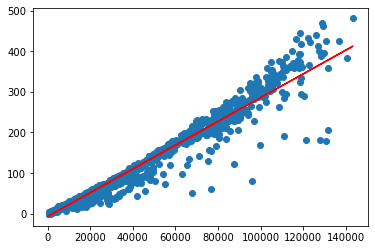

In [19]:
plt.scatter(x_data.squeeze(), y_data)
plt.plot(x_data.squeeze(), pred, 'r')
plt.show()

# TEST IMAGES
